# Two-Sample-Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Paired data

Let $(X_1, Y_1), \dots, (X_n, Y_n)$ be paired data such that the Difference $D_i = X_i - Y_i$ satisfies the requirements of the 1-sample t-test. Let $\mu_X = E(X_i)$ and $\mu_Y = E(Y_i)$. Then, $\mu = E(D) = \mu_X - \mu_Y$. Therefore testing

$$
\begin{split}
H_0 &: \mu_X = \mu_Y \\
H_1 &: \mu_X \neq \mu_Y
\end{split}
$$

can be achieved by performing a 1-sample t-test for

$$
H_0: \mu = 0 \text{ vs } H_1 : \mu \neq 0
$$

**Test Statistic**

For the test statistic we assume the difference between the two groups.

$$
T = \frac{\bar{X} - \bar{Y}}{\frac{s_x}{\sqrt{n}}}
$$

In [2]:
x = stats.norm(100, 1).rvs(100)
y = x - stats.norm(1, 5).rvs(100)

d = x - y

# Perform the test
alpha = 0.05
d_mean = np.mean(d)
std = np.std(d, ddof=1)

c = stats.t(d.shape[0] - 1).ppf(1 - alpha / 2)  # right-sided

t = (d_mean) / (std / np.sqrt(d.shape[0]))

p_value = 1 - stats.norm().cdf(t)

print(f"Rejection area: [{c}; inf]")
print(f"T-statistics:   {t}")
print(f"P-Value:        {p_value}")
print(f"Is significant: {p_value < alpha}")

Rejection area: [1.9842169515086827; inf]
T-statistics:   1.006216961461008
P-Value:        0.15715560739037338
Is significant: False


## Differences in two groups

We assume that $X$ and $Y$ are independent random variables with

$$
\begin{split}
X \sim N(\mu, \sigma_X^2) \\
Y \sim N(\mu, \sigma_Y^2)
\end{split}
$$

for a given $\Delta \in \mathbb{R}$

$$H_0: \mu_X - \mu_Y = \Delta$$

against the alternative

$$
\begin{split}
H_1 &: \mu_x - \mu_y \leq \Delta \text{ or} \\
H_1 &: \mu_x - \mu_y \neq \Delta \text{ or} \\
H_1 &: \mu_x - \mu_y \geq \Delta
\end{split}
$$

### Equal variance

Let $X_1, \dots, X_n$ and $Y_1, \dots, Y_n$ be independent samples of $X$ and $Y$ with

$$
\sigma_x = \sigma_Y = \sigma
$$

Given $H_0$ is true, we find that the statistic

$$
T = \frac{\bar{X} - \bar{Y} - \Delta}{s_P * \sqrt{\frac{1}{n} + \frac{1}{m}}}
$$

follows a student-t distribution with $m + n - 2$ degrees of freedom. Here

$$
s_P^2 = \frac{(n - 1)s_X^2 + (m - 1)s_Y^2}{n + m - 2}
$$

is the pooled variance

In [5]:
x = stats.norm(300, 2).rvs(100)
y = stats.norm(297, 2).rvs(60)

delta = 3  # Assumed difference in the group

x_mean = np.mean(x)
y_mean = np.mean(y)

x_var = np.var(x, ddof=1)
y_var = np.var(y, ddof=1)

n = x.shape[0]
m = y.shape[0]

c = stats.t(n + m - 2).ppf(1 - 0.05 / 2)

sp = np.sqrt(((n - 1) * x_var + (m - 1) * y_var) / (n + m - 2))
t = (x_mean - y_mean - delta) / (sp * np.sqrt(1 / n + 1 / m))

p = 1 - stats.t(n + m - 2).cdf(t)

print(f"T-Statistic: {t}")
print(f"Rejection a: {c}")
print(f"P-Value:     {p}")

T-Statistic: 0.18942639773551548
Rejection a: 1.975092072704601
P-Value:     0.42500088002587844


In [6]:
t, p = stats.ttest_ind(x, y + delta, equal_var=True, alternative='greater')

print(f"T-Statistic: {t}")
print(f"P-Value:     {p}")

T-Statistic: 0.18942639773551548
P-Value:     0.42500088002587844


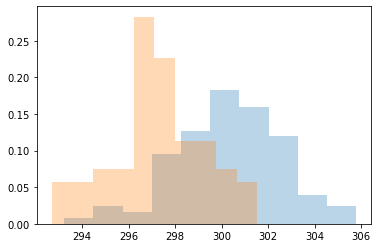

In [7]:
plt.hist(x, density=True, alpha=.3)
plt.hist(y, density=True, alpha=.3)
plt.show()

### Welch Test

- If the variance of $X$ and $Y$ are different, then the pooled variance $S_P$ can not be computed
- The test statistic $T$ is computed similarly, but the distribution under $H_0$ is now known
- It is possible to approximate the distribution of $T$ by a t-distribution
- In this case the test is called the Welch-Test

In [8]:
x = stats.norm(300, np.random.randint(1, 3)).rvs(1000)
y = stats.norm(297, np.random.randint(1, 3)).rvs(600)
delta = 3

n = x.shape[0]
m = y.shape[0]
alpha = 0.05

c = stats.t(n + m - 2).ppf(1 - alpha / 2)

In [9]:
t, p = stats.ttest_ind(x, y + delta, equal_var=False, alternative='greater')

print(f"T-Statistic: {t}")
print(f"Rejection a: {c}")
print(f"P-Value:     {p}")

T-Statistic: 0.2532131916753035
Rejection a: 1.9614496156420809
P-Value:     0.40007234294834687
